In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
%cd downloads

C:\Users\DELL\downloads


In [6]:
dataset=pd.read_csv("loan_data.csv")
dataset

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0             360.0   
1               3000                0.0        66.0             360.0   
2               2583             2358.0       120.0             360.0   
3               6000                0.0       141.0             360.0   
4               2333             1516.0        95.0             360.0   
..               ...                ...         ...               ...   
376             5703                0.0       128.0             360.0   
377             3232             1950.0       108.0             360.0   
378             2900                0.0        71.0             360.0   
379             4106                0.0        40.0             180.0   
380             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Rural           N  
1               1.0         Urban           Y  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
376             1.0         Urban           Y  
377             1.0         Rural           Y  
378             1.0         Rural           Y  
379             1.0         Rural           Y  
380             0.0     Semiurban           N  

[381 rows x 13 columns]

In [7]:
dataset.shape

(381, 13)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [9]:
dataset.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       381.000000         381.000000  381.000000        370.000000   
mean       3579.845144        1277.275381  104.986877        340.864865   
std        1419.813818        2340.818114   28.358464         68.549257   
min         150.000000           0.000000    9.000000         12.000000   
25%        2600.000000           0.000000   90.000000        360.000000   
50%        3333.000000         983.000000  110.000000        360.000000   
75%        4288.000000        2016.000000  127.000000        360.000000   
max        9703.000000       33837.000000  150.000000        480.000000   

       Credit_History  
count      351.000000  
mean         0.837607  
std          0.369338  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

### how the credit history effect the loan status of each of the applicant

In [11]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status       N    Y  All
Credit_History               
0.0              54    3   57
1.0              52  242  294
All             106  245  351

### visualize variables in dataset using histogram

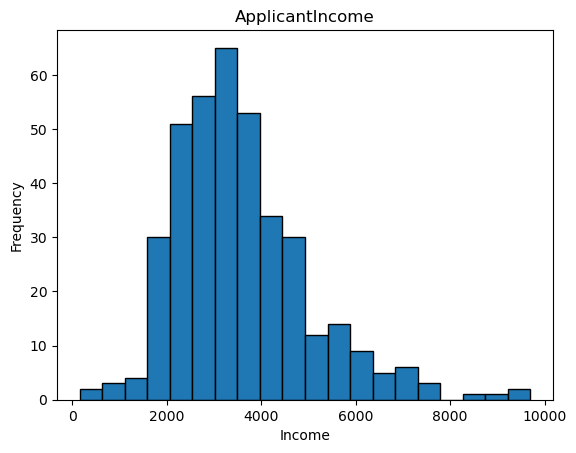

In [13]:
plt.hist(dataset['ApplicantIncome'],bins=20,edgecolor='black')
plt.title('ApplicantIncome',loc='center')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

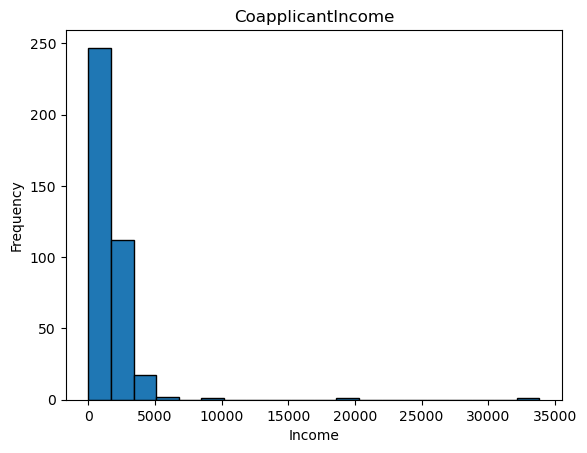

In [14]:
plt.hist(dataset['CoapplicantIncome'],bins=20,edgecolor='black')
plt.title('CoapplicantIncome',loc='center')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

### understand the relatonship between ApplicantIncome and Education through boxplot

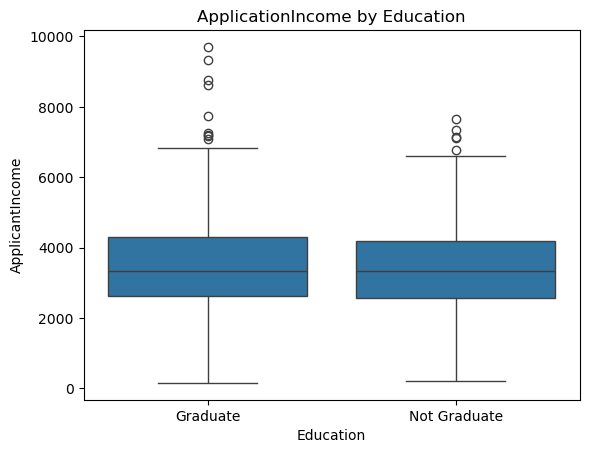

In [16]:
sns.boxplot(x='Education',y='ApplicantIncome',data=dataset)
plt.title('ApplicationIncome by Education')
plt.xlabel('Education')
plt.ylabel('ApplicantIncome')
plt.show()

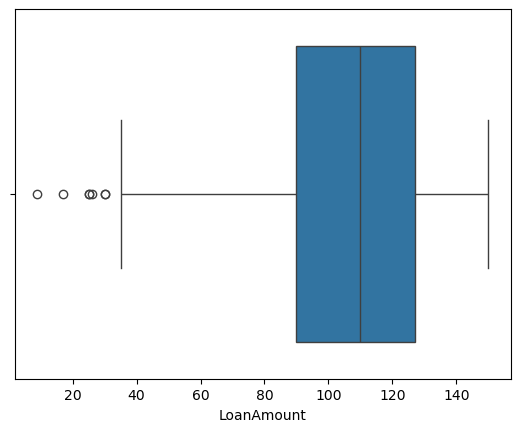

In [17]:
sns.boxplot(x='LoanAmount',data=dataset)
plt.xlabel('LoanAmount')
plt.show()

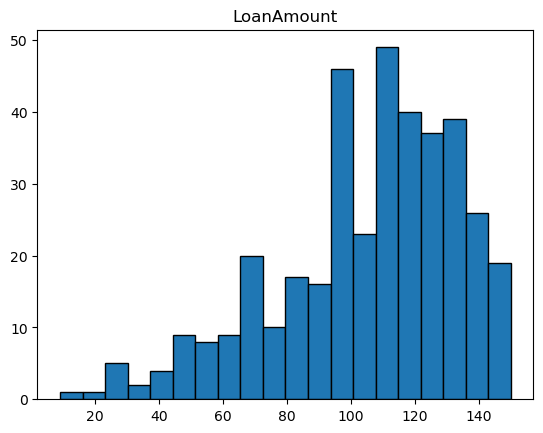

In [18]:
plt.hist(dataset['LoanAmount'],bins=20,edgecolor='black')
plt.title('LoanAmount',loc='center')
plt.show()

### normalizing using log function

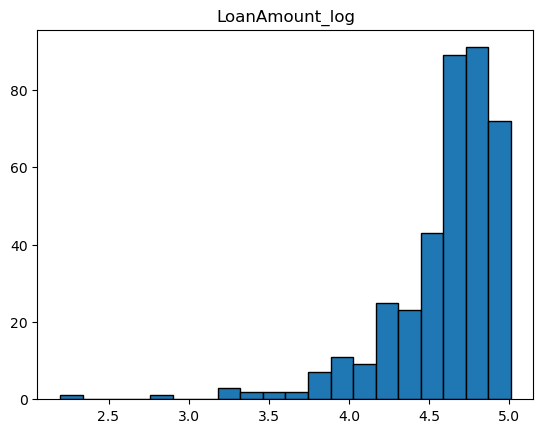

In [20]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
plt.hist(dataset['LoanAmount_log'],bins=20,edgecolor='black')
plt.title('LoanAmount_log',loc='center')
plt.show()

### findout the missing values in our dataset

In [22]:
dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
LoanAmount_log        0
dtype: int64

### handle this values by filling that missing values

In [24]:
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode()[0])

In [25]:
dataset['Married']=dataset['Married'].fillna(dataset['Married'].mode()[0])

In [26]:
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])

In [27]:
 dataset['Self_Employed']=dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [28]:
dataset.LoanAmount=dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log=dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [29]:
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0])

In [30]:
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0])

In [31]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

### ApplicantIncome and CoapplicantIncome are not normalize so we doing sum of it and findout the total income

In [33]:
dataset['TotalIncome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])

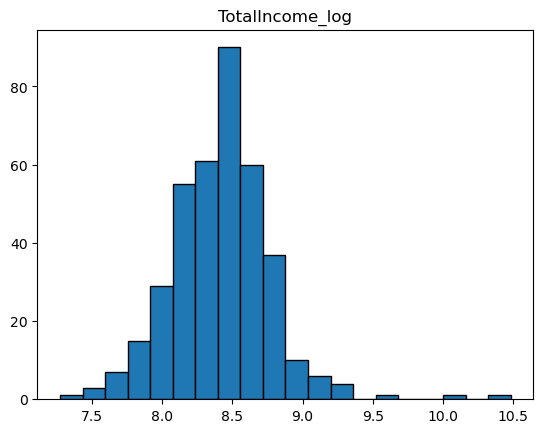

In [34]:
plt.hist(dataset['TotalIncome_log'],bins=20,edgecolor='black')
plt.title('TotalIncome_log',loc='center')
plt.show()

In [35]:
dataset.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  LoanAmount_log  TotalIncome  \
0             1.0         Rural           N        4.852030       6091.0   
1             1.0         Urban           Y        4.189655       3000.0   
2             1.0         Urban           Y        4.787492       4941.0   
3             1.0         Urban           Y        4.948760       6000.0   
4             1.0         Urban           Y        4.553877       3849.0   

   TotalIncome_log  
0         8.714568  
1         8.006368  
2         8.505323  
3         8.699515  
4         8.255569

### extra columns are added due to log so to normalize that divide the dataset in dependent and independent variables x=independent,y=dependent

In [37]:
x=dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y=dataset.iloc[:,12].values

In [38]:
x

array([['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.787491742782046, 4941.0],
       ...,
       ['Female', 'No', '0', ..., 1.0, 4.2626798770413155, 2900.0],
       ['Male', 'Yes', '3+', ..., 1.0, 3.6888794541139363, 4106.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [39]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

### split dataset into train and test dataset

In [212]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)


In [214]:
print(x_train)

[['Male' 'Yes' '0' 'Graduate' 360.0 1.0 4.700480365792417 4801.0]
 ['Male' 'Yes' '3+' 'Graduate' 180.0 1.0 3.6888794541139363 4106.0]
 ['Male' 'Yes' '0' 'Not Graduate' 360.0 1.0 4.700480365792417 4286.0]
 ['Female' 'No' '1' 'Graduate' 360.0 1.0 4.718498871295094 3541.0]
 ['Male' 'Yes' '0' 'Graduate' 120.0 1.0 3.2188758248682006 3459.0]
 ['Male' 'Yes' '1' 'Not Graduate' 360.0 1.0 4.90527477843843 4583.0]
 ['Female' 'Yes' '2' 'Graduate' 480.0 1.0 4.727387818712341 3663.0]
 ['Female' 'No' '0' 'Graduate' 360.0 0.0 4.634728988229636 5000.0]
 ['Male' 'Yes' '1' 'Graduate' 360.0 1.0 3.4011973816621555 2963.0]
 ['Male' 'No' '0' 'Graduate' 360.0 1.0 4.30406509320417 3943.0]
 ['Female' 'No' '0' 'Not Graduate' 360.0 0.0 4.382026634673881 2720.0]
 ['Female' 'Yes' '0' 'Graduate' 360.0 1.0 4.727387818712341 6232.0]
 ['Male' 'Yes' '2' 'Graduate' 360.0 1.0 4.564348191467836 3859.0]
 ['Female' 'No' '0' 'Graduate' 360.0 1.0 4.709530201312334 3846.0]
 ['Female' 'No' '0' 'Not Graduate' 360.0 1.0 3.97029191

### using label encoder for converting categorial text into numerical form(0 and 1) 

In [44]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_X=LabelEncoder()

### create an instance of labelEncoder use for loop to apply it on each on the index which we want convert the text into numeric format

In [46]:
for i in range(0,5):
    x_train[:,i]=Labelencoder_X.fit_transform(x_train[:,i])

In [47]:
x_train[:,7]=Labelencoder_X.fit_transform(x_train[:,7])

In [48]:
x_train

array([[1, 1, 0, 0, 2, 1.0, 4.700480365792417, 50],
       [1, 1, 3, 0, 1, 1.0, 3.6888794541139363, 27],
       [1, 1, 0, 1, 2, 1.0, 4.700480365792417, 34],
       [0, 0, 1, 0, 2, 1.0, 4.718498871295094, 15],
       [1, 1, 0, 0, 0, 1.0, 3.2188758248682006, 13],
       [1, 1, 1, 1, 2, 1.0, 4.90527477843843, 40],
       [0, 1, 2, 0, 3, 1.0, 4.727387818712341, 18],
       [0, 0, 0, 0, 2, 0.0, 4.634728988229636, 53],
       [1, 1, 1, 0, 2, 1.0, 3.4011973816621555, 4],
       [1, 0, 0, 0, 2, 1.0, 4.30406509320417, 23],
       [0, 0, 0, 1, 2, 0.0, 4.382026634673881, 1],
       [0, 1, 0, 0, 2, 1.0, 4.727387818712341, 64],
       [1, 1, 2, 0, 2, 1.0, 4.564348191467836, 22],
       [0, 0, 0, 0, 2, 1.0, 4.709530201312334, 21],
       [0, 0, 0, 1, 2, 1.0, 3.970291913552122, 0],
       [1, 0, 2, 0, 2, 0.0, 4.700480365792417, 16],
       [1, 1, 0, 0, 2, 1.0, 4.564348191467836, 20],
       [1, 1, 0, 1, 2, 1.0, 4.465908118654584, 55],
       [1, 1, 0, 0, 2, 1.0, 4.465908118654584, 3],
       [1, 0, 0

In [49]:
Labelencoder_y=LabelEncoder()
y_train=Labelencoder_y.fit_transform(y_train)

In [50]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [51]:
for i in range(0,5):
    x_test[:,i]=Labelencoder_X.fit_transform(x_test[:,i])

In [52]:
x_test[:,7]=Labelencoder_X.fit_transform(x_test[:,7])

In [53]:
Labelencoder_y=LabelEncoder()
y_test=Labelencoder_y.fit_transform(y_test)

In [54]:
x_test

array([[0, 0, 1, ..., 1.0, 4.718498871295094, 84],
       [1, 0, 2, ..., 0.0, 4.382026634673881, 59],
       [1, 0, 0, ..., 1.0, 4.543294782270004, 155],
       ...,
       [1, 0, 0, ..., 1.0, 4.787491742782046, 220],
       [1, 1, 0, ..., 1.0, 4.787491742782046, 213],
       [1, 1, 3, ..., 1.0, 4.605170185988092, 157]], dtype=object)

In [55]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

### scale the data which make the analysis and preduction much better

In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

### applying algorithm on dataset decision tree classifier to predict outcome

In [205]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [207]:
y_pred=DTClassifier.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

### y_pred is the predicted value as per algorithum and y_test is the actual outcome which is expected

In [210]:
from sklearn import metrics
print('The accuracy of decision tree is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is: 0.7672131147540984
